## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [2]:
student_df = pd.read_csv('stud.csv')

In [3]:
student_df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
student_df.shape

(1000, 8)

In [5]:
## checking for missing values
student_df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insight 
- The dataset has no missing values

In [6]:
student_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
### checking Duplicate values
student_df.duplicated().sum()

0

#### There is no duplicate values in the dataset

In [8]:
## checking data types
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### The dataset has 5 categorical columns and 3 numerical columns

In [9]:
### Checking for unique values
student_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
student_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

In [11]:
student_df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
numerical_features, categorical_features = [], []

for feature in student_df.columns:
    if student_df[feature].dtype == 'int64' or student_df[feature].dtype == 'float64':
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

In [13]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [15]:
#### Aggreating the total score with mean
student_df['Total_score'] = student_df[numerical_features].sum(axis=1)

In [16]:
student_df['Mean_score'] = student_df[numerical_features].mean(axis=1)

In [17]:
student_df.Mean_score

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Mean_score, Length: 1000, dtype: float64

The `kde` parameter in seaborn's `histplot` function stands for Kernel Density Estimation. It's a technique used to smooth a histogram and create an estimate of the probability density function of a random variable.

When `kde=True`, seaborn will plot a density curve in addition to the histogram. This can help you visualize the distribution of the data more clearly, especially when the number of bins in the histogram is small.

In the context of your code:

```python
sns.histplot(data=student_df, x='Mean_score', kde=True, color='blue')
```

This line is creating a histogram of the 'Mean_score' column in the `student_df` DataFrame. Because `kde=True`, it's also plotting a density curve on top of the histogram. The color of the histogram and the density curve is set to blue.

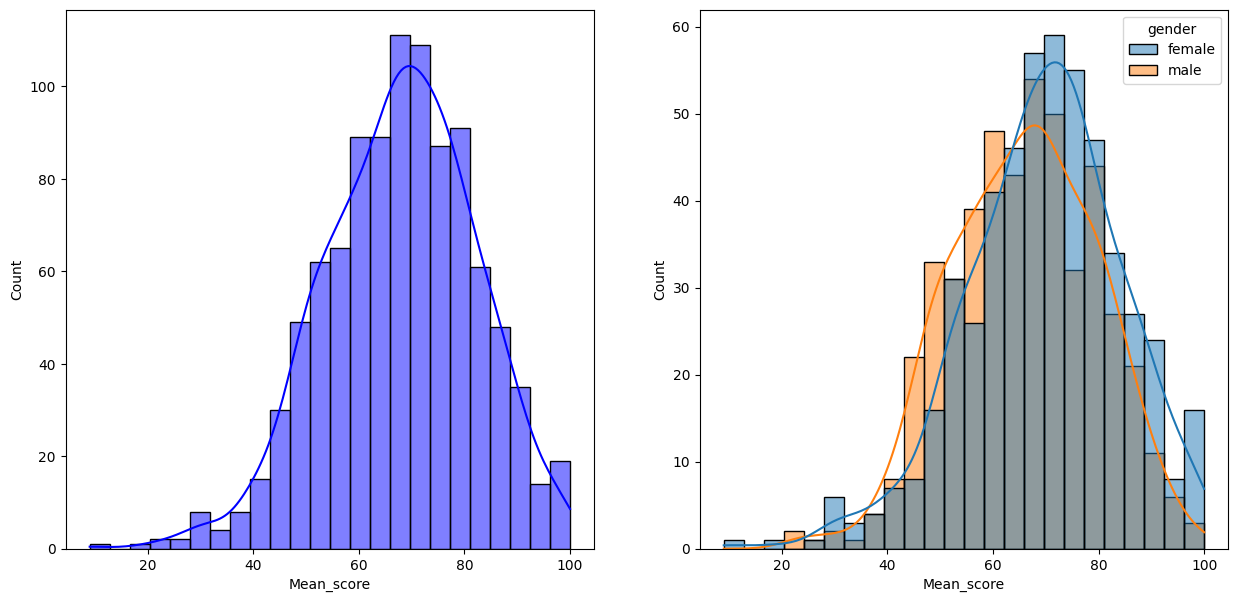

In [18]:
## Explore More Visualizations
fig , axis = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=student_df, x='Mean_score', kde=True, color='blue')
plt.subplot(122)
sns.histplot(data=student_df, x='Mean_score', kde=True, hue='gender' , color='red' )
plt.show()

## Insights
- Female student tend to perform well than male students

In [19]:
student_df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Mean_score'],
      dtype='object')

<Axes: xlabel='Mean_score', ylabel='Count'>

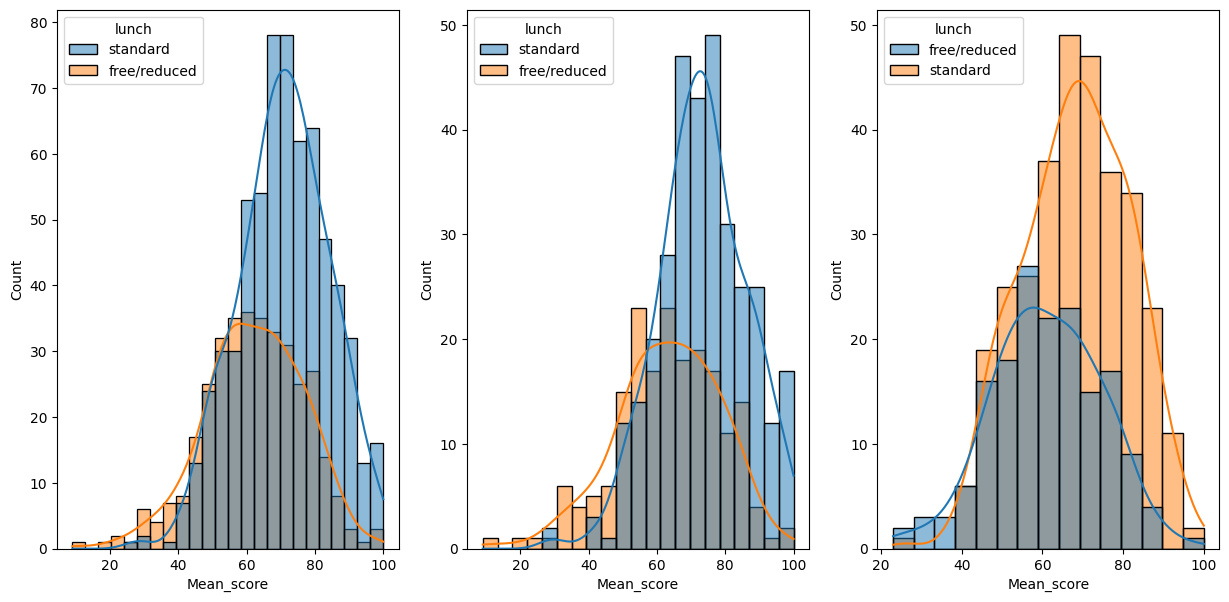

In [20]:
fig , axis = plt.subplots(1,3,figsize=(15,7))
sns.histplot(data=student_df,x='Mean_score',kde=True,ax=axis[0],hue='lunch',color='green')
sns.histplot(data=student_df[student_df.gender=='female'],x='Mean_score',kde=True,ax=axis[1],color='blue',hue='lunch')
sns.histplot(data=student_df[student_df.gender=='male'],x='Mean_score',kde=True,ax=axis[2],color='red',hue='lunch')

## Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

In [27]:
student_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='Mean_score', ylabel='Count'>

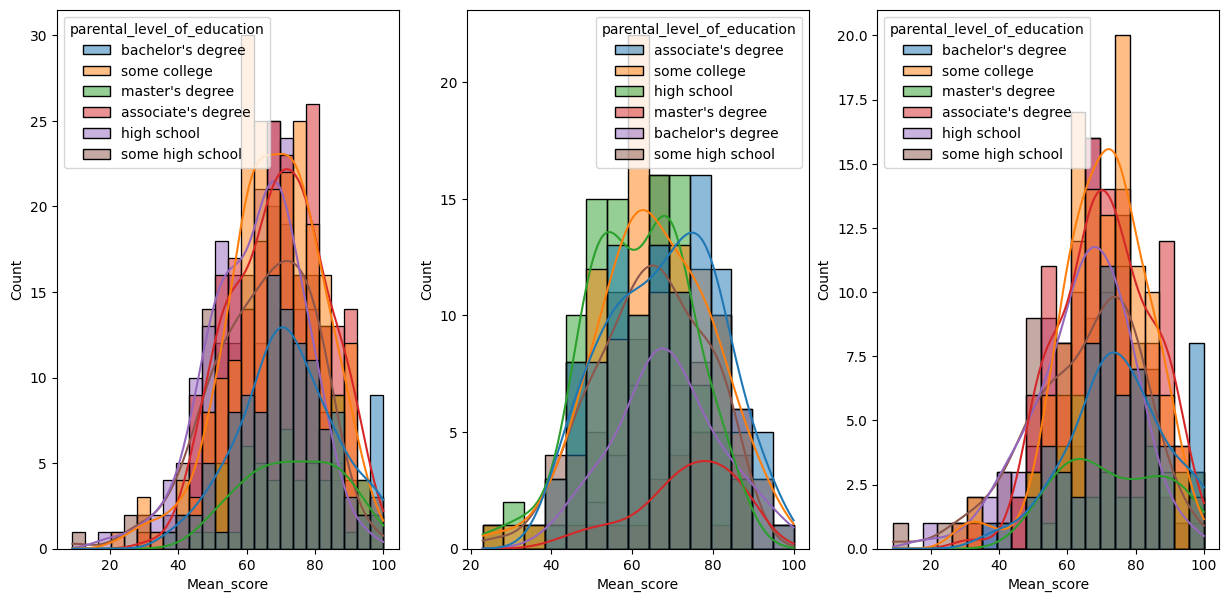

In [32]:
fig , axis = plt.subplots(1,3,figsize = (15,7))
sns.histplot(data=student_df,x='Mean_score',kde=True ,hue='parental_level_of_education',color='green',ax=axis[0])
sns.histplot(data= student_df[student_df.gender=='male'],x='Mean_score',ax=axis[1],kde=True,hue='parental_level_of_education',color='blue')
sns.histplot(data=student_df[student_df.gender=='female'],x = 'Mean_score', hue='parental_level_of_education', kde=True, color='red',ax=axis[2])



#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='Mean_score', ylabel='Count'>

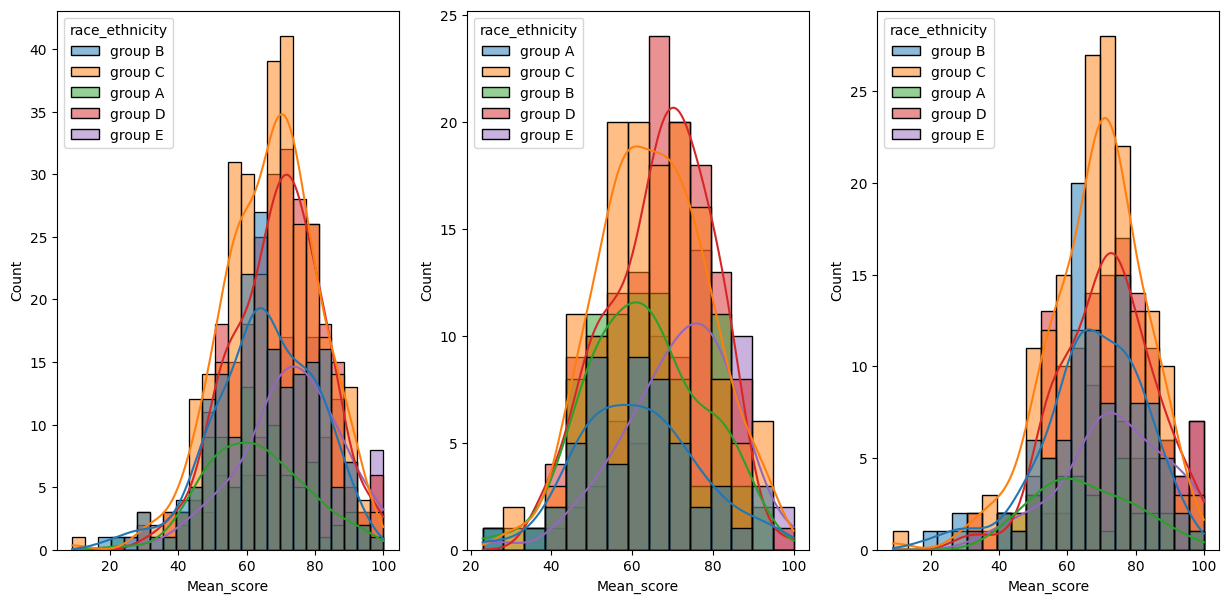

In [33]:
fig, axis = plt.subplots(1,3,figsize=(15,7))
sns.histplot(data=student_df,x='Mean_score',kde=True,ax=axis[0],hue='race_ethnicity',color='green')
sns.histplot(data=student_df[student_df.gender=='male'],x='Mean_score',kde=True,ax=axis[1],hue='race_ethnicity',color='blue')
sns.histplot(data=student_df[student_df.gender=='female'] ,x='Mean_score',kde=True,ax=axis[2],
hue='race_ethnicity',color='red')

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female .
- Students of group C , D , E tends to perform well in exam.
- female students from group A poor in exam compared to boys from group A . 


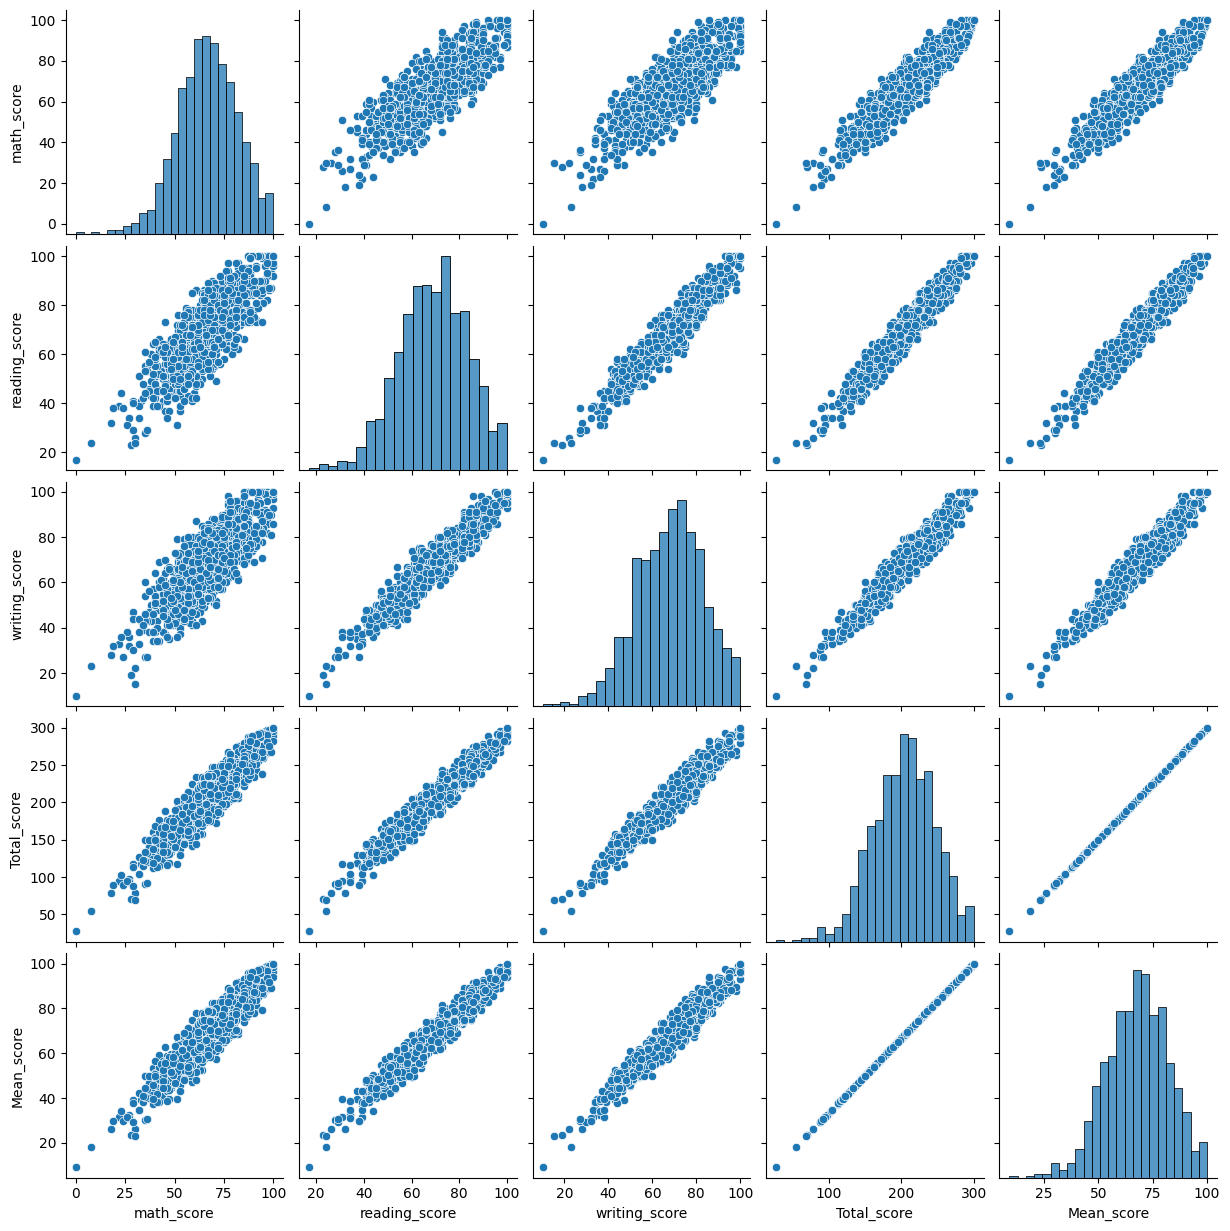

In [35]:
sns.pairplot(student_df)

<Axes: >

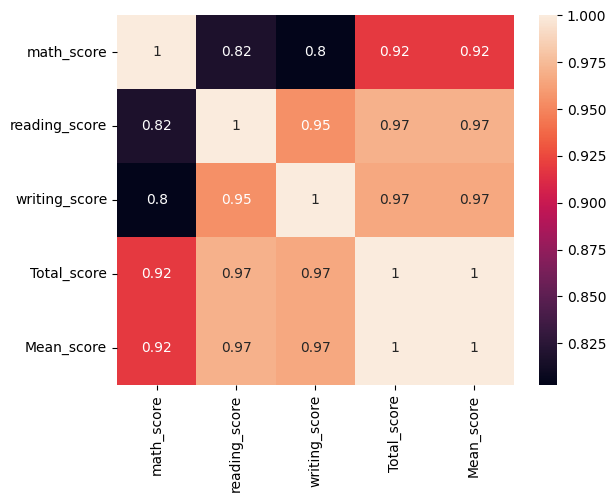

In [38]:
sns.heatmap(student_df.corr(numeric_only=True), annot=True)

### Insights
- writing and reading score are highly correlated with each other and math score is a little less correlated with writing and reading score